- dataset: https://www.kaggle.com/datasets/outliersloop/footballyolov8
- yolov8 github: https://github.com/ultralytics/ultralytics
- yolov8 docs: https://docs.ultralytics.com/quickstart/

# Install YOLOv8:

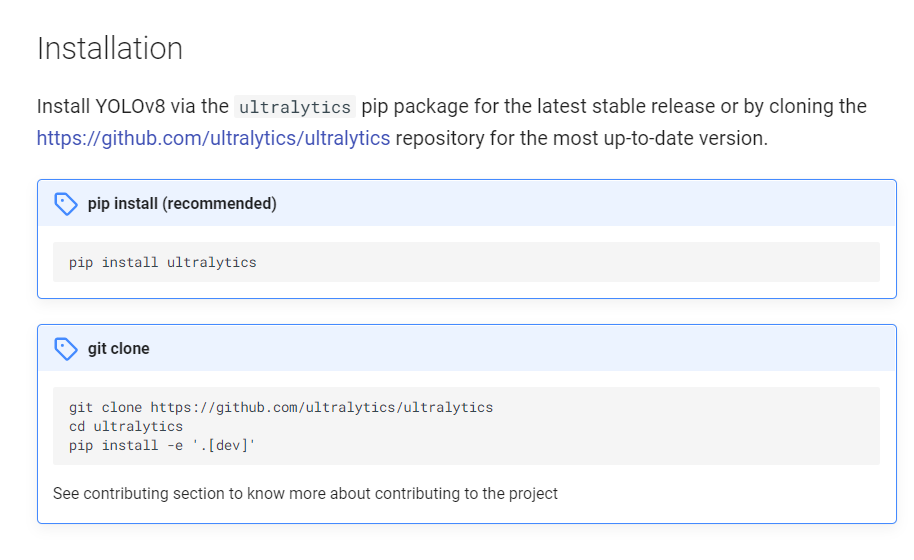

In [1]:

# Pip install (recommended)

!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# Creating train-val split

In [2]:
## importing required libraries
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [3]:
## connecting to the google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!scp '/content/drive/MyDrive/SKRIPSI/drone.zip' '/content/drone.zip'

!unzip '/content/drone.zip' -d '/content/'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/dataset/pic_277_jpg.rf.18d7a3d2d55b17154f9d56583fe86ee4.jpg  
  inflating: /content/dataset/pic_277_jpg.rf.18d7a3d2d55b17154f9d56583fe86ee4.txt  
  inflating: /content/dataset/pic_277_jpg.rf.512adc84890620161b4a7d0e9dc668f4.jpg  
  inflating: /content/dataset/pic_277_jpg.rf.512adc84890620161b4a7d0e9dc668f4.txt  
  inflating: /content/dataset/pic_277_jpg.rf.648d8a91104be2cdadcd12174e1b3360.jpg  
  inflating: /content/dataset/pic_277_jpg.rf.648d8a91104be2cdadcd12174e1b3360.txt  
  inflating: /content/dataset/pic_277_jpg.rf.6b8fda452e992103ba412c3d770cdc78.jpg  
  inflating: /content/dataset/pic_277_jpg.rf.6b8fda452e992103ba412c3d770cdc78.txt  
  inflating: /content/dataset/pic_277_jpg.rf.7f39dd31c4819b1bbcdc059396f54142.jpg  
  inflating: /content/dataset/pic_277_jpg.rf.7f39dd31c4819b1bbcdc059396f54142.txt  
  inflating: /content/dataset/pic_277_jpg.rf.cef6253524e33ac052a79df4661dc8f9.jpg  
  inflating: /con

In [5]:
train_path_img = "./yolo_data/images/train/"
train_path_label = "./yolo_data/labels/train/"
val_path_img = "./yolo_data/images/val/"
val_path_label = "./yolo_data/labels/val/"
test_path = "./yolo_data/test"

In [6]:
'''
Split the dataset into train and test and creates the train.txt and test.tx with
the respective path of the images in each folder
'''

def train_test_split(path,neg_path=None, split = 0.2):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images


    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size

    ## creating required directories

    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)


    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')



    print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")

    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')

        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")

        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")



    ### copytin images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")

    print("------ TASK COMPLETED -------")

## spliting the data into train-test and creating train.txt and test.txt files
# train_test_split('/content/drive/MyDrive/custom_notebooks/yolo_data/')

### for label_tag
train_test_split('/content/dataset/') ### without negative images
# train_test_split('./data/','./negative_images/') ### if you want to feed negative images

------ PROCESS STARTED -------
--- This folder has a total number of 8520 images---


  0%|          | 0/6816 [00:00<?, ?it/s]

------ Training data created with 80% split 6816 images -------


  0%|          | 0/1704 [00:00<?, ?it/s]

------ Testing data created with a total of 1704 images ----------
------ TASK COMPLETED -------


In [ ]:
!zip -r /content/yolo_data.zip /content/yolo_data

Output streaming akan dipotong hingga 5000 baris terakhir.
  adding: content/yolo_data/labels/train/pic_397_jpg.rf.fa9d2ef9bd934613165bff33204a3309.txt (deflated 34%)
  adding: content/yolo_data/labels/train/moto15545_png.rf.598be7d1b68c5218f15bbcddb3d7fa06.txt (deflated 30%)
  adding: content/yolo_data/labels/train/dd_00513_jpg.rf.f05378bcbe8841cfc709a5d2964ab3cb.txt (deflated 30%)
  adding: content/yolo_data/labels/train/pic_056_jpg.rf.f1b691c77e9090550e815f4ae82c9157.txt (deflated 35%)
  adding: content/yolo_data/labels/train/pic_1110_jpg.rf.f719e50f27e8dc7c5b279e50e1ebed81.txt (deflated 21%)
  adding: content/yolo_data/labels/train/video16_213_JPEG_jpg.rf.a52526e18680b4f6aee3a69c05b8189d.txt (deflated 26%)
  adding: content/yolo_data/labels/train/dd_00781_jpg.rf.72836c6d5068dad813790f7d6cdf9df4.txt (deflated 12%)
  adding: content/yolo_data/labels/train/pic_379_jpg.rf.2b45ec664bd3279cb27848fd2848de7a.txt (deflated 15%)
  adding: content/yolo_data/labels/train/pics59_jpg.rf.ec865ddc

In [ ]:
from google.colab import files

files.download("/content/yolo_data.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

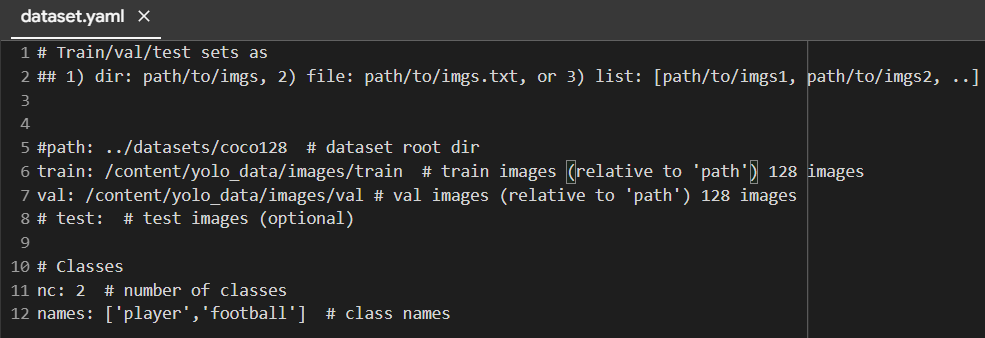

In [7]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


# Command Line Interface:


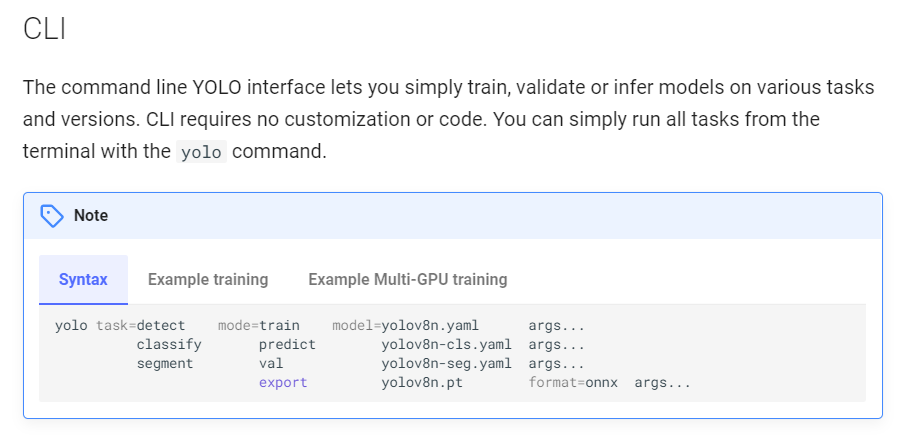

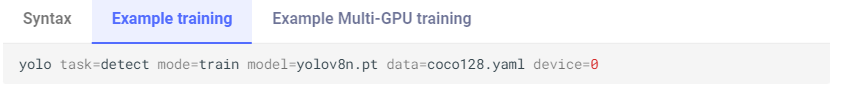

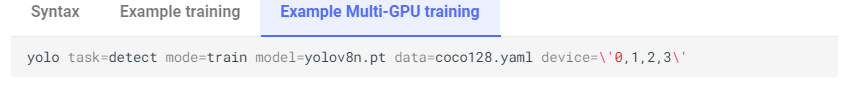

## Training

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/SKRIPSI/drone.yaml epochs=25 imgsz=640 batch=16 project=/content/drive/MyDrive/SKRIPSI/drone_results name=drone_nano

100% 6.25M/6.25M [00:00<00:00, 188MB/s]
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/SKRIPSI/drone.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/SKRIPSI/drone_results, name=drone_nano, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

## Inferencing

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8drone/training_results/vehicle_nano/weights/best.pt conf=0.55 source=/content/drive/MyDrive/yolov8drone/test_images save=True

In [ ]:
!cp -r /content/runs/detect/predict /content/drive/MyDrive/yolov8drone/output

### inferencing on video


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Skripsi_dataset/drone.pt conf=0.35 source=/content/drive/MyDrive/Skripsi_dataset/video.mp4 save=True

Streaming output truncated to the last 5000 lines.
video 1/1 (frame 11947/16943) /content/drive/MyDrive/Skripsi_dataset/video.mp4: 384x640 1 drone, 122.3ms
video 1/1 (frame 11948/16943) /content/drive/MyDrive/Skripsi_dataset/video.mp4: 384x640 1 drone, 140.6ms
video 1/1 (frame 11949/16943) /content/drive/MyDrive/Skripsi_dataset/video.mp4: 384x640 1 drone, 135.3ms
video 1/1 (frame 11950/16943) /content/drive/MyDrive/Skripsi_dataset/video.mp4: 384x640 1 drone, 125.4ms
video 1/1 (frame 11951/16943) /content/drive/MyDrive/Skripsi_dataset/video.mp4: 384x640 2 drones, 131.2ms
video 1/1 (frame 11952/16943) /content/drive/MyDrive/Skripsi_dataset/video.mp4: 384x640 1 drone, 129.2ms
video 1/1 (frame 11953/16943) /content/drive/MyDrive/Skripsi_dataset/video.mp4: 384x640 1 drone, 129.2ms
video 1/1 (frame 11954/16943) /content/drive/MyDrive/Skripsi_dataset/video.mp4: 384x640 2 drones, 116.3ms
video 1/1 (frame 11955/16943) /content/drive/MyDrive/Skripsi_dataset/video.mp4: 384x640 1 drone, 118.4ms
vi

In [ ]:
!cp -r /content/runs/detect/predict /content/drive/MyDrive/Skripsi_dataset/output

Convert to TensorFlow.js

In [ ]:
!cp -r /content/drive/MyDrive/yolov8drone/training_results/drone_nano/weights/best.pt /content

In [ ]:
!pip install tensorflow tensorflowjs

In [ ]:
import tensorflow as tf

saved_model_dir = '/content/best_saved_model'  # Ganti dengan path yang sesuai dengan model SavedModel Anda

model = tf.saved_model.load(saved_model_dir)
print("Tanda Tangan yang Tersedia:", model.signatures)


In [ ]:
# !yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/football2/weights/best.pt conf=0.5 source=/content/drive/MyDrive/yolov8/videos

In [ ]:
# !cp -r /content/runs/detect/predict3 /content/drive/MyDrive/yolov8/output

## Export the model -- In progress

Export a YOLOv8 model to any supported format with the `format` argument, i.e. `format=onnx`.

Format                  | `format=...**bold text**`         | Model
---                     | ---                       | ---
PyTorch                 | -                         | yolov8n.pt
TorchScript             | `torchscript`             | yolov8n.torchscript
ONNX                    | `onnx`                    | yolov8n.onnx
OpenVINO                | `openvino`                | yolov8n_openvino_model/
TensorRT                | `engine`                  | yolov8n.engine
CoreML                  | `coreml`                  | yolov8n.mlmodel
TensorFlow SavedModel   | `saved_model`             | yolov8n_saved_model/
TensorFlow GraphDef     | `pb`                      | yolov8n.pb
TensorFlow Lite         | `tflite`                  | yolov8n.tflite
TensorFlow Edge TPU     | `edgetpu`                 | yolov8n_edgetpu.tflite
TensorFlow.js           | `tfjs`                    | yolov8n_web_model/
PaddlePaddle            | `paddle`                  | yolov8n_paddle_model/

In [ ]:
!yolo mode=export model=/content/drive/MyDrive/yolov8drone/training_results/drone_medium/weights/best.pt format=onnx

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('/content/drive/MyDrive/yolov8drone/training_results/drone_nano/weights/best.pt')  # load a custom trained model

# Export the model
model.export(format='tfjs')